In [1]:
import minpy.numpy as np
import cPickle
import matplotlib.pyplot as plt
import minpy
minpy.set_global_policy('only_numpy')

from VirtualRatModel import VirtualRatModel
from VirtualRatSolver import VirtualRatSolver
from VirtualRatBox import VirtualRatBox
from VirtualRat import VirtualRat
from dataProcessFunctions import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# auto-reloading external modules
%load_ext autoreload
%autoreload 2

W1106 03:25:29 9929 minpy.dispatch.registry:register:47] Type MXNet for name reshape has already existed
/gpfsnyu/packages/lpython/2.7/intelpython2/lib/python2.7/site-packages/IPython/core/formatters.py:98: DeprecationWarning: DisplayFormatter._formatters_default is deprecated: use @default decorator instead.
  def _formatters_default(self):
/gpfsnyu/packages/lpython/2.7/intelpython2/lib/python2.7/site-packages/IPython/core/formatters.py:677: DeprecationWarning: PlainTextFormatter._deferred_printers_default is deprecated: use @default decorator instead.
  def _deferred_printers_default(self):
/gpfsnyu/packages/lpython/2.7/intelpython2/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):
/gpfsnyu/packages/lpython/2.7/intelpython2/lib/python2.7/site-packages/IPython/core/formatters.py:672: DeprecationWarning: PlainTextFormatter.

In [2]:
epoch_per_loop = 100
num_loop = 101
pro_block_matrix, pro_switch_matrix, anti_block_matrix, anti_switch_matrix \
    = np.zeros((0,num_loop)),np.zeros((0,num_loop)),np.zeros((0,num_loop)),np.zeros((0,num_loop))
for i in range(10,110,10):
    try:
        matrices = load_weights("TrainingTime-"+str(i)+".pkl")
    except IOError:
        continue
    pro_block, pro_switch, anti_block, anti_switch = matrices
    pro_block_matrix = np.append(pro_block_matrix, pro_block,axis=0)
    anti_block_matrix = np.append(anti_block_matrix, anti_block,axis=0)
    pro_switch_matrix = np.append(pro_switch_matrix, pro_switch,axis=0)
    anti_switch_matrix = np.append(anti_switch_matrix, anti_switch,axis=0)
matrices = [pro_block_matrix,anti_block_matrix,pro_switch_matrix,anti_switch_matrix]

In [3]:
threshold1= 0.9
threshold2=0.7
threshold3 = 0.95
good = np.logical_and(pro_block_matrix[:,-1] > threshold1,  anti_block_matrix[:,-1] > threshold1)
bad = np.logical_not(good)
criteria1 = np.logical_or(pro_switch_matrix[:,40] < threshold2, anti_switch_matrix[:,40] < threshold2)
criteria2 = np.logical_or(pro_switch_matrix[:,95] < threshold3, anti_switch_matrix[:,95] < threshold3)
late = np.logical_or(criteria1,criteria2)
good_late = np.logical_and(good, late)
early = np.logical_not(late)
good_early = np.logical_and(good, early)

bad_pro_block = pro_block_matrix[bad,:]
bad_anti_block = anti_block_matrix[bad,:]
bad_pro_switch = pro_switch_matrix[bad,:]
bad_anti_switch = anti_switch_matrix[bad,:]
bad_matrices = [bad_pro_block, bad_pro_switch, 
                bad_anti_block, bad_anti_switch]

good_pro_block = pro_block_matrix[good,:]
good_anti_block = anti_block_matrix[good,:]
good_pro_switch = pro_switch_matrix[good,:]
good_anti_switch = anti_switch_matrix[good,:]
good_matrices = [good_pro_block, good_pro_switch, 
                good_anti_block, good_anti_switch]

late_pro_block = pro_block_matrix[good_late,:]
late_anti_block = anti_block_matrix[good_late,:]
late_pro_switch = pro_switch_matrix[good_late,:]
late_anti_switch = anti_switch_matrix[good_late,:]
late_matrices = [late_pro_block, late_pro_switch, 
                late_anti_block, late_anti_switch]

early_pro_block = pro_block_matrix[good_early,:]
early_anti_block = anti_block_matrix[good_early,:]
early_pro_switch = pro_switch_matrix[good_early,:]
early_anti_switch = anti_switch_matrix[good_early,:]
early_matrices = [early_pro_block, early_pro_switch, 
                early_anti_block, early_anti_switch]

In [4]:
print pro_block_matrix.shape
print good_pro_block.shape
print late_pro_block.shape
print early_pro_block.shape

(100, 101)
(93, 101)
(10, 101)
(83, 101)


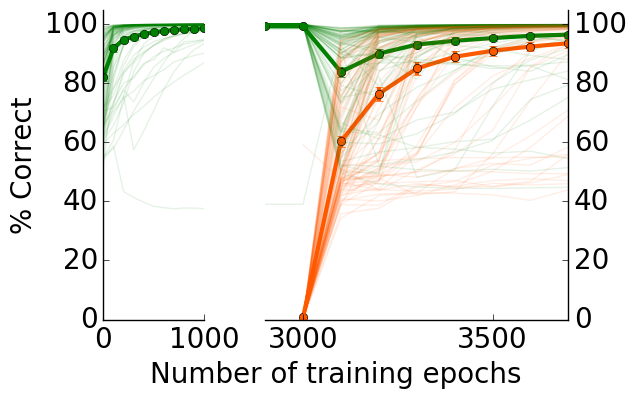

In [99]:
accuracy_vs_time(epoch_per_loop, num_loop, matrices = good_matrices, individual = True, xlim1=(0,1000), xlim2=(2900,3700), filename="learningCurve.pdf")
#accuracy_vs_time(epoch_per_loop, num_loop, matrices = late_matrices, individual = True, xlim1=(0,8000), xlim2=(8000,10000))
#accuracy_vs_time(epoch_per_loop, num_loop, matrices = early_matrices, individual = True,  xlim1=(3000,4000), xlim2=(8000,10000))

In [6]:
threshold_edge = 0.85
large_enough = np.logical_and(pro_block_matrix > threshold_edge, anti_block_matrix > threshold_edge)
time_steps = []
for i in range(large_enough.shape[0]):
    for j in range(large_enough.shape[1]):
        if large_enough[i,j]:
            time_steps.append((i,j))
            break
print time_steps

[(1, 32), (2, 31), (3, 31), (4, 34), (5, 31), (6, 32), (8, 31), (9, 31), (10, 69), (11, 33), (12, 40), (13, 40), (14, 32), (15, 33), (16, 32), (17, 34), (18, 32), (19, 33), (20, 31), (21, 33), (22, 31), (23, 32), (24, 33), (25, 35), (26, 32), (27, 32), (28, 32), (29, 32), (30, 33), (31, 32), (32, 31), (33, 32), (34, 36), (35, 35), (36, 34), (37, 32), (38, 31), (39, 35), (41, 31), (42, 31), (43, 31), (44, 31), (45, 46), (46, 47), (47, 32), (48, 32), (50, 32), (51, 32), (52, 32), (53, 31), (54, 33), (55, 33), (56, 37), (57, 36), (58, 31), (59, 32), (60, 32), (61, 32), (62, 33), (63, 32), (64, 32), (65, 85), (66, 35), (67, 33), (68, 42), (69, 33), (70, 31), (71, 33), (73, 32), (74, 39), (75, 33), (76, 36), (77, 32), (78, 35), (79, 32), (80, 31), (81, 32), (83, 33), (84, 33), (85, 40), (86, 32), (87, 32), (88, 34), (89, 46), (90, 46), (91, 36), (92, 34), (93, 32), (94, 34), (95, 32), (96, 33), (98, 32), (99, 32)]


In [7]:
#save_weights("time_steps_for_3d-0.85.pkl",time_steps)

In [8]:
mean_pro_block = []
mean_anti_block = []
mean_pro_switch = []
mean_anti_switch = []
for i in range(len(time_steps)):
    mean_pro_block.append(pro_block_matrix[time_steps[i][0],time_steps[i][1]])
    mean_anti_block.append(anti_block_matrix[time_steps[i][0],time_steps[i][1]])
    mean_pro_switch.append(pro_switch_matrix[time_steps[i][0],time_steps[i][1]])
    mean_anti_switch.append(anti_switch_matrix[time_steps[i][0],time_steps[i][1]])
mean_pro_block_acc = np.mean(mean_pro_block)
mean_anti_block_acc = np.mean(mean_anti_block)
mean_pro_switch_acc = np.mean(mean_pro_switch)
mean_anti_switch_acc = np.mean(mean_anti_switch)

In [9]:
print mean_pro_block_acc
print mean_anti_block_acc
print mean_pro_switch_acc 
print mean_anti_switch_acc 

0.958295487435
0.920389802545
0.897952035768
0.86370547467


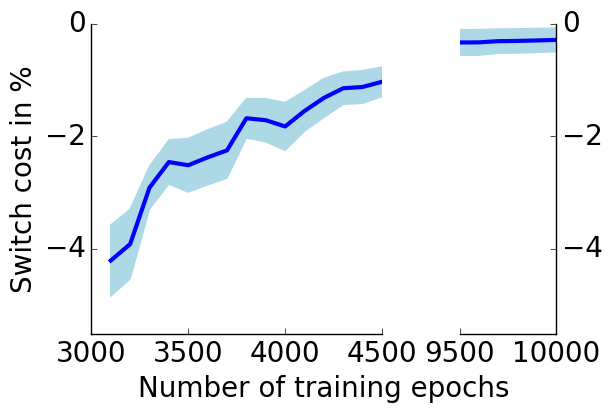

In [97]:
switch_cost_vs_time(epoch_per_loop, num_loop, matrices = good_matrices, \
                    individual = False, xlim1=(3000,4500), xlim2=(9500,10000), combine = True, filename="SC_time.pdf")